In [1]:
# import all necessary libraries

import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
from utils.plotData import plotData
from utils.costFunction import costFunction,gradient
from utils.plotDecisionBoundary import plotDecisionBoundary
from utils.sigmoid import sigmoid
from utils.predict import predict

In [2]:
# load the data from text file

data = np.loadtxt('ex2data1.txt', delimiter=',')
X = np.array(data[:, :2])
y = np.reshape(data[:, 2], (X.shape[0], 1))

# Part 1: Plotting

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



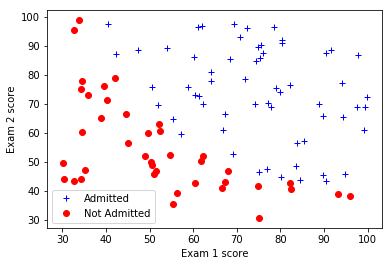

In [3]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
fig, ax = plt.subplots()
positives = np.where(y == 1) # get indices for the positives
negatives = np.where(y == 0) # get indices for the negatives
ax.plot(X[positives[0], 0], X[positives[0], 1], 'bo', marker='+', label='Admitted')
ax.plot(X[negatives[0], 0], X[negatives[0], 1], 'ro', marker='o', label='Not Admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend()
fig

# Part 2: Compute Cost and Gradient

In [4]:
designMatrix = np.column_stack((np.ones(len(X)), X))  # Add intercept term to x and X_test
initial_theta = np.zeros((designMatrix.shape[1], 1))  # Initialize fitting parameters
cost = costFunction(initial_theta, designMatrix, y)
grad = gradient(initial_theta, designMatrix, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros):')
print(grad[0], '\n', grad[1], '\n', grad[2], '\n')
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.69314718056
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
[-0.1] 
 [-12.00921659] 
 [-11.26284221] 

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [5]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
cost = costFunction(test_theta, designMatrix, y)
grad = gradient(test_theta, designMatrix, y)
print('\nCost at test theta: \n', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(grad[0], '\n', grad[1], '\n', grad[2], '\n')
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


Cost at test theta: 
 0.218330193827
Expected cost (approx): 0.218

Gradient at test theta: 

[ 0.04290299] 
 [ 2.56623412] 
 [ 2.64679737] 

Expected gradients (approx):
 0.043
 2.566
 2.647



# Part 3: Optimizing using optimize

In [6]:
# Run scipy.optimize.fmin to obtain the optimal theta
# This function will return theta and the cost
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html
optimizedTheta = op.fmin(costFunction, x0=initial_theta, args=(designMatrix, y), maxiter=400)

# Print theta to screen
print('\nCost at theta found by fmin: ',  costFunction(optimizedTheta, designMatrix, y))
print('Expected cost (approx): 0.203\n')
print('Theta: \n')
print(optimizedTheta[0], '\n', optimizedTheta[1], '\n', optimizedTheta[2], '\n')
print('Expected theta (approx):\n')
print(' -25.161\n 0.206\n 0.201\n')

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287

Cost at theta found by fmin:  0.20349770159
Expected cost (approx): 0.203

Theta: 

-25.1613006236 
 0.206231420869 
 0.201471428635 

Expected theta (approx):

 -25.161
 0.206
 0.201



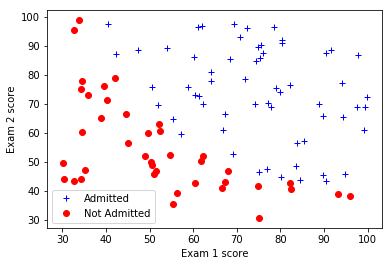

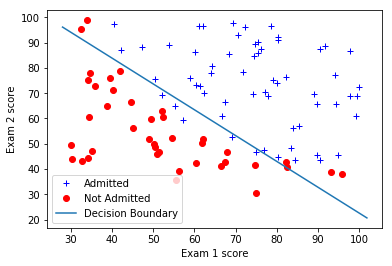

In [7]:
# Ploting decision Boundary
plotDecisionBoundary(optimizedTheta, designMatrix, y)